## Download dataset

In [1]:
import kagglehub
import os
# change to local path if already downloaded
dataset_path = kagglehub.dataset_download("Cornell-University/arxiv")
dataset_path = os.path.join(dataset_path, "arxiv-metadata-oai-snapshot.json")
dataset_path

'/Users/bbagaliyska/.cache/kagglehub/datasets/Cornell-University/arxiv/versions/212/arxiv-metadata-oai-snapshot.json'

## Read large jsonl file in chunks 

In [2]:
import pandas as pd
chunksize = 1000
chunks = pd.read_json(dataset_path, lines=True, chunksize = chunksize)

## Calculate important aggreggate characteristics on dataset

In [3]:
total_records = 0
category_counts = {}
category_types = set()
for chunk in chunks:
    chunk = chunk[['categories']]
    total_records += len(chunk)
    chunk_cat_types = {type(cat) for cat in chunk['categories']}
    category_types.update(chunk_cat_types)
    for category in chunk['categories']:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

In [4]:
total_records

2635119

Total records: 2635119

In [5]:
category_types

{str}

In [6]:
category_counts

{'hep-ph': 82442,
 'math.CO cs.CG': 216,
 'physics.gen-ph': 7204,
 'math.CO': 31143,
 'math.CA math.FA': 836,
 'cond-mat.mes-hall': 35797,
 'gr-qc': 31353,
 'cond-mat.mtrl-sci': 40750,
 'astro-ph': 86911,
 'math.NT math.AG': 2880,
 'math.NT': 22919,
 'math.CA math.AT': 4,
 'hep-th': 59769,
 'math.PR math.AG': 8,
 'hep-ex': 18045,
 'nlin.PS physics.chem-ph q-bio.MN': 1,
 'math.NA': 9149,
 'nlin.PS': 2070,
 'cond-mat.str-el cond-mat.stat-mech': 1621,
 'math.RA': 6780,
 'math.CA math.PR': 195,
 'cond-mat.str-el': 26707,
 'physics.optics physics.comp-ph': 319,
 'q-bio.PE q-bio.CB quant-ph': 1,
 'q-bio.QM q-bio.MN': 130,
 'hep-ph hep-lat nucl-th': 757,
 'math.OA math.FA': 1370,
 'math.QA math-ph math.MP': 552,
 'physics.gen-ph quant-ph': 246,
 'cond-mat.stat-mech cond-mat.mtrl-sci': 877,
 'astro-ph nlin.CD physics.plasm-ph physics.space-ph': 2,
 'nlin.PS nlin.SI': 212,
 'quant-ph cs.IT math.IT': 853,
 'cs.NE cs.AI': 722,
 'gr-qc astro-ph': 1577,
 'physics.ed-ph quant-ph': 111,
 'math.DG gr-

In [19]:
import json
with open("../analysis/categories.json", "w") as outfile: 
    json.dump(category_counts, outfile)

In [8]:
len(category_counts)

87362

There are 87362 distinct values for categories column and most of these contain multiple categories, so this is a multi-label classification task with the distinct categories as non-exclusive labels.

In [9]:
from functools import reduce
distinct_categories = reduce(lambda acc, cats: acc.union(cats.split(' ')), category_counts.keys(), set())

In [10]:
distinct_categories

{'acc-phys',
 'adap-org',
 'alg-geom',
 'ao-sci',
 'astro-ph',
 'astro-ph.CO',
 'astro-ph.EP',
 'astro-ph.GA',
 'astro-ph.HE',
 'astro-ph.IM',
 'astro-ph.SR',
 'atom-ph',
 'bayes-an',
 'chao-dyn',
 'chem-ph',
 'cmp-lg',
 'comp-gas',
 'cond-mat',
 'cond-mat.dis-nn',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'cond-mat.other',
 'cond-mat.quant-gas',
 'cond-mat.soft',
 'cond-mat.stat-mech',
 'cond-mat.str-el',
 'cond-mat.supr-con',
 'cs.AI',
 'cs.AR',
 'cs.CC',
 'cs.CE',
 'cs.CG',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.DB',
 'cs.DC',
 'cs.DL',
 'cs.DM',
 'cs.DS',
 'cs.ET',
 'cs.FL',
 'cs.GL',
 'cs.GR',
 'cs.GT',
 'cs.HC',
 'cs.IR',
 'cs.IT',
 'cs.LG',
 'cs.LO',
 'cs.MA',
 'cs.MM',
 'cs.MS',
 'cs.NA',
 'cs.NE',
 'cs.NI',
 'cs.OH',
 'cs.OS',
 'cs.PF',
 'cs.PL',
 'cs.RO',
 'cs.SC',
 'cs.SD',
 'cs.SE',
 'cs.SI',
 'cs.SY',
 'dg-ga',
 'econ.EM',
 'econ.GN',
 'econ.TH',
 'eess.AS',
 'eess.IV',
 'eess.SP',
 'eess.SY',
 'funct-an',
 'gr-qc',
 'hep-ex',
 'hep-lat',
 'hep-ph',
 'hep-th',
 'm

In [11]:
len(distinct_categories)

176

The number of distinct categories is 176.

In [12]:
distinct_categories_count = {k: 0 for k in distinct_categories}

for categories, count in category_counts.items():
    categories = categories.split(' ')
    for category in categories:
        distinct_categories_count[category] += count
        
distinct_categories_count

{'cond-mat.other': 16030,
 'stat.TH': 24117,
 'cs.NI': 23422,
 'atom-ph': 123,
 'cs.NE': 15313,
 'math.HO': 3750,
 'alg-geom': 1423,
 'math.SP': 10023,
 'hep-th': 170707,
 'cs.ET': 5111,
 'math.DG': 43442,
 'cond-mat.mtrl-sci': 96292,
 'math.AT': 16203,
 'math.OC': 51605,
 'math.MG': 11605,
 'q-fin.PR': 2014,
 'econ.EM': 4034,
 'nucl-ex': 26432,
 'physics.data-an': 10764,
 'math.FA': 32245,
 'math.CA': 22918,
 'q-fin.CP': 2628,
 'q-bio.BM': 5927,
 'physics.atm-clus': 2807,
 'cs.GL': 216,
 'bayes-an': 16,
 'q-bio.OT': 1338,
 'cs.RO': 37442,
 'cs.CY': 21058,
 'math.GT': 23525,
 'q-bio.TO': 2359,
 'solv-int': 1413,
 'astro-ph.IM': 30694,
 'econ.TH': 2747,
 'q-fin.RM': 2420,
 'physics.comp-ph': 24067,
 'cs.MA': 8457,
 'nlin.SI': 12127,
 'nucl-th': 58502,
 'math.DS': 38231,
 'q-bio.CB': 2236,
 'q-bio.PE': 11767,
 'q-bio': 1356,
 'comp-gas': 221,
 'math.QA': 19439,
 'hep-ex': 55301,
 'math.LO': 13795,
 'cs.OH': 2228,
 'cs.PF': 4205,
 'math.RT': 27081,
 'q-bio.MN': 3821,
 'cs.HC': 20683,
 'nl

In [13]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(distinct_categories_count, orient='index', columns=['count'])
df = df.sort_values('count', ascending=True)

In [40]:
import matplotlib.pyplot as plt

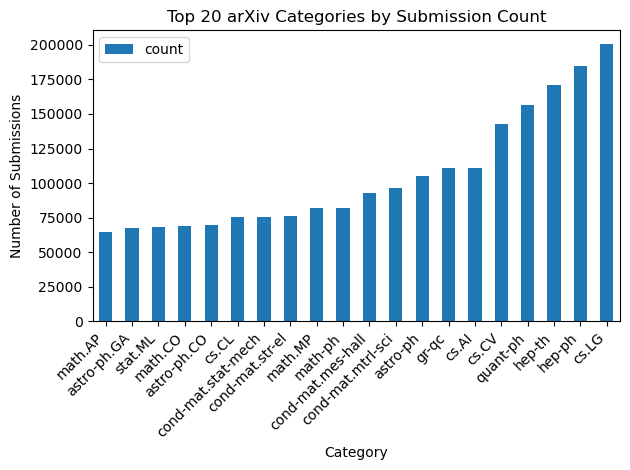

In [33]:
df.tail(20).plot(kind='bar')
plt.title('Top 20 arXiv Categories by Submission Count')
plt.xlabel('Category')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees for better readability
plt.tight_layout()
plt.show()

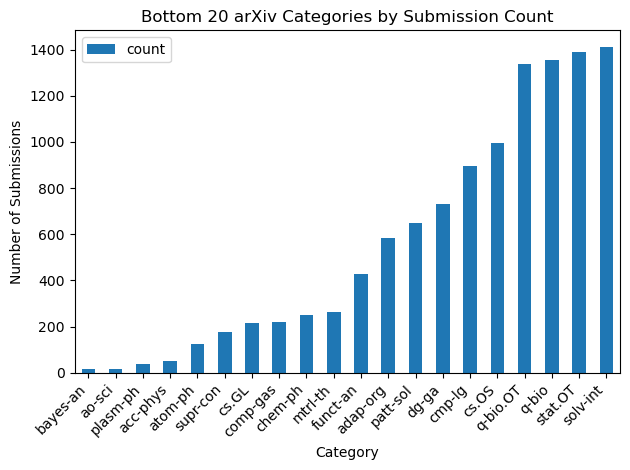

In [35]:
df.head(20).plot(kind='bar')
plt.title('Bottom 20 arXiv Categories by Submission Count')
plt.xlabel('Category')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
df['count'].mean()

25626.051136363636

In [41]:
df['count'].median()

13557.0

In [42]:
df['count'].max()

200479

In [43]:
df['count'].min()

16

In [46]:
df['count'].min() / total_records * 100

0.0006071832050089579

In [47]:
df['count'].max() / total_records * 100

7.607967609811929

Mean: 25626.051136363636  
Median: 13557.0  
Max: 200479  
Min: 16  
There are big disparities in the article distribution among different categories where some categories are very misrepresented (i.e. the least frequent one being less than 0.0006% of the data) while few others like Machine Learning and Physics greatly dominate (~7.6%). In formal terms the dataset has a class imbalance problem.  
This could result in the model training being motivated to minimize loss for the frequent categories while having poor accuracy on minority ones.  
To mitigate this we can modify the loss function to apply weights to classes in proportion to their distribution, so as to penalize more misclasiffication of rare classes. This loss is called Balanced Cross-Entropy loss and the weighting factor applied to each class is represented by the Greek letter alpha in the range [0, 1]. Alpha could be the inverse class frequency or a hyper-parameter that is determined by cross-validation.   
However, this may result in the model overfitting to those samples and still being poor in generalizing to unseen ones. A solution for this could be to generate synthetic examples for these categories in training.  
Since the dominant classes have more than enough samples to learn from, we can undersample those classes and still expect the model to learn their specifics well.  
Also the metrics used to evaluate the model accuracy should reflect per class performance instead of being computed on the whole dataset. This can be done with calculating precision, recall and f1-score per class and then aggregating them taking an average to treat different classes as equal. However a weighted average would be benefitial too since likely the data which will get passed to the API will mimic the distribution from the dataset, so this would give a better estimate of the end user experience.  

In [48]:
label_count = {}
for categories, count in category_counts.items():
    category_count = len(categories.split(' '))
    if category_count in label_count:
        label_count[category_count] += count
    else:
        label_count[category_count] = count

In [49]:
label_count

{1: 1397458,
 2: 783573,
 3: 315798,
 4: 102003,
 5: 28936,
 6: 6241,
 8: 157,
 7: 903,
 9: 33,
 10: 14,
 11: 2,
 13: 1}

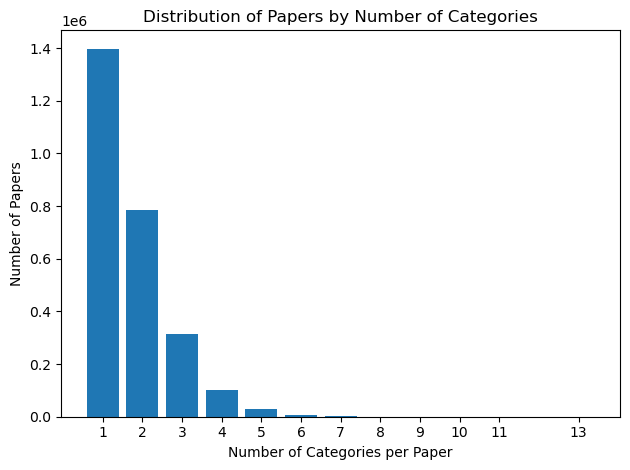

In [52]:
label_counts = sorted(label_count.keys())
sample_counts = [label_count[count] for count in label_counts]
plt.bar(label_counts, sample_counts)
plt.title('Distribution of Papers by Number of Categories')
plt.xlabel('Number of Categories per Paper')
plt.ylabel('Number of Papers')
plt.xticks(label_counts)
plt.tight_layout()
plt.show()

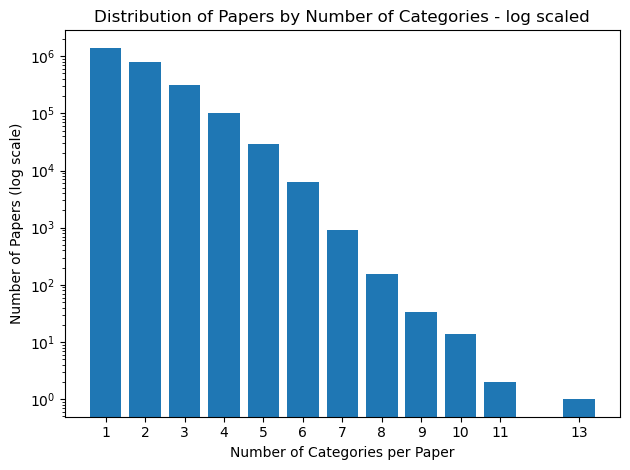

In [53]:
label_counts = sorted(label_count.keys())
sample_counts = [label_count[count] for count in label_counts]
plt.bar(label_counts, sample_counts)
plt.yscale('log')
plt.title('Distribution of Papers by Number of Categories - log scaled')
plt.xlabel('Number of Categories per Paper')
plt.ylabel('Number of Papers (log scale)')
plt.xticks(label_counts)
plt.tight_layout()
plt.show()

In [55]:
single_labeled_percentage = label_count[1] / total_records
single_labeled_percentage

0.5303206420658801

It can be seen that the number of categories follows a logarithm-like curve, with about half the examples having a single category and ~47% having multiple ones, so enabling the classifier to successfully output multiple labels is important. The output layer needs to produce probabilities for each label (so #neurons = #distinct caterogies) with a sigmoid activation function, so each label can be independently predicted instead of interrelated as is the case with softmax.   
  
This means the loss function should not be Categorical Cross-Entropy as for multi-class classification, but Binary Cross-Entropy instead, as the outputs would not be 1-hot encoded and instead can have an arbitrary number of 1's. The Binary Cross-Entropy loss would treat each category prediction as an independent binary classification problem and then sum the losses of all. In practice categories are most likely conditionally dependent on each other where for example categories from the same field are more likely to be attributed together as opposed to having cross-field collaborations, but the expectation is that the weights of the network will be able to learn these patterns based on the dataset instead of applying additional customizations to encode this in the training procedure.  
  
Based on the previous observations, to handle the class imbalance, we could apply a Weighted Binary (Sigmoid) Cross-Entropy loss to attribute weight to categories according to their distribution. The pytorch nn.BCEWithLogitsLoss seems to achieve this if it is passed a tensor of weights for each class.  
A weight calculation can for example be: weight_for_class_i = total_samples / (num_samples_in_class_i * num_classes) [2]  
  
Another technique which can be used to address the class imbalance problem is to use Focal loss [1], which is a variant of Cross-Enropy where the loss gets scaled dynamically by reducing the relative loss for well-classified examples and in this way attributing more weight to misclassified ones, thus focusing more on problematic classes as training progresses. This can make training a bit more flexible than the static weights for each class, as it dynamically focuses on hard examples based on the current iteration of the model. If time permits and results from Binary Cross-Entropy are not satisfactory, I'd try this approach. This would introduce additional hyperparameters to tune - the focusing parameter gamma and optionally the weighting factor alpha for the weighted version of the formula [3]. Cross-validation can be performed for tuning these, but would require additional time and computing resources for training different versions.  

Resources:   
[1] https://paperswithcode.com/method/focal-loss  
[2] https://medium.com/@zergtant/use-weighted-loss-function-to-solve-imbalanced-data-classification-problems-749237f38b75  
[3] https://towardsdatascience.com/focal-loss-a-better-alternative-for-cross-entropy-1d073d92d075  

## Model choice
In terms of model choice, the main variants of pre-trained BERT models of the `base` size are `bert-base-uncased` and `bert-base-cased`, respectively trained on uncased and cased versions of the same text with some additional processing of accented words in the uncased case.  
Since our model's inputs will be research article abstracts with proper nouns, acronyms and other case-sensitive domain-specific terms, which could be one of the most important bits of the input in order to correctly classify a category, using the case-sensitive `bert-base-cased` variation should have more potential to capture the input text semantics and key terminology. The other post-processing of special characters the uncased version does could also strip key information from common scientific notations used.  

In [14]:
from transformers import BertForSequenceClassification

categories_count = len(distinct_categories)
model = BertForSequenceClassification.from_pretrained("bert-base-cased", num_labels=categories_count, problem_type="multi_label_classification")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


This model by default uses Binary Cross-Entropy, since we specify problem_type is multi-label classification

## Tokenizing inputs

Use the model's corresponding tokenizer. Use the fast version, to optimize performance for batching. 
The BERT model has a max input of 512 tokens and during training uses 2 sentences for the NSP task, separated by [SEP] symbol. We may need to apply transformations on our input to fit these constraints.

In [17]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased', is_fast=True)

In [22]:
tokenizer.is_fast

True

## Analyze abstract characteristics

Do a second pass on the data, this time to check how the abstract inputs relate to BERT's input constraints

In [30]:
chunksize = 1000
chunks = pd.read_json(dataset_path, lines=True, chunksize=chunksize)
sentence_counts = {}
max_token_count = 0
avg_token_count = 0.0
chunk_count = 0
max_chunk_count = 100
token_overload_count = 0
avg_overload_count = 0
for chunk in chunks:
    chunk_count += 1
    if chunk_count > max_chunk_count:
        break
    chunk = chunk[["abstract"]]
    chunk_size = len(chunk)
    sum_token_count = 0.0
    for abstract in chunk["abstract"]:
        abstract = abstract.strip()
        sentence_count = len(abstract.split("."))
        if abstract.endswith("."):
            sentence_count -= 1
        if sentence_count in sentence_counts:
            sentence_counts[sentence_count] += 1
        else:
            sentence_counts[sentence_count] = 1
        tokenized = tokenizer(abstract, truncation=False, return_tensors="pt")
        tokenized_length = len(tokenized.input_ids[0])
        sum_token_count += tokenized_length
        if tokenized_length > max_token_count:
            max_token_count = tokenized_length
        if tokenized_length > 512:
            token_overload_count += 1
            avg_overload_count += (tokenized_length - 512)
    avg_token_count += sum_token_count / chunk_size
avg_token_count /= chunk_count
avg_overload_count /= token_overload_count

In [51]:
max_token_count - 512

334

In [32]:
token_overload_count

330

In [33]:
analyzed_abstract_count = max_chunk_count * chunksize

In [34]:
token_overload_count / analyzed_abstract_count * 100

0.33

In [35]:
avg_overload_count

52.945454545454545

Taking a sample of 100k examples, indeed some were above the BERT's token threshold of 512, but that was only 0.33% of them. Additionally, the examples which were above the threshold did not exceed it much on average - only ~53 tokens on average and the biggest outlier being 334.   

Considering this, a truncation strategy where abstracts get cut off after they hit the max token count might suffice, since most of the time this would still pass along the majority of the abstract information. Also usually the most valuable and information-rich part of an abstract is in the beginning, so the classifier should have enough context for its predictions.  
If this is not enough, another approach could be to first run the abstract through a summarization model, which would condense the text length into BERT's input size.  
Alternatively, we could chunk the abstract into sliding window segments and pass these to the model, then aggregate the results using the average or most-confident prediction.  
Both are viable solutions, but I'd start with the first one and after training evaluate if the model often misclassifies exactly the truncated abstracts - if so, I'd apply one of the others.

## Visualizing sentence counts 

In [48]:
grouped_counts = {}
for i in range(1, 11):
    grouped_counts[str(i)] = 0
grouped_counts['10-15'] = 0
grouped_counts['15-20'] = 0
grouped_counts['20+'] = 0

for sent_count, count in sentence_counts.items():
    if sent_count <= 10:
        grouped_counts[str(sent_count)] += count
    elif sent_count <= 15:
        grouped_counts['10-15'] += count
    elif sent_count <= 20:
        grouped_counts['15-20'] += count
    else:
        grouped_counts['20+'] += count



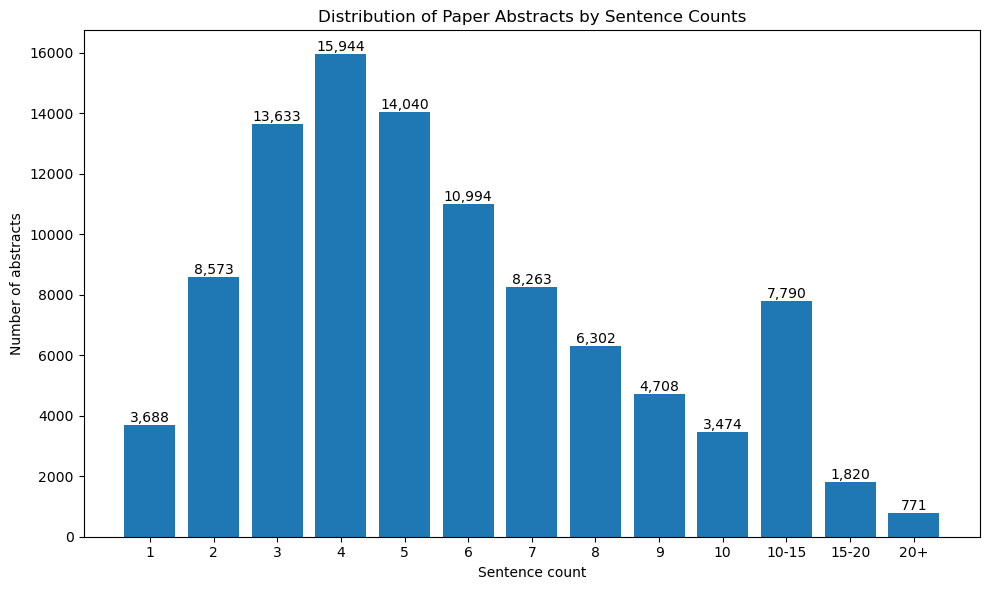

In [50]:
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_counts.keys(), grouped_counts.values())
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')
plt.title('Distribution of Paper Abstracts by Sentence Counts')
plt.xlabel('Sentence count')
plt.ylabel('Number of abstracts')
plt.tight_layout()
plt.show()


It is quite common to have more than 2 sentences, so different strategies can be employed to handle multiple. 
The one I choose is to not distinguish between sentences using the [SEP] token and instead pass all tokens as part of the first segment, with the tradeoff of losing the segment encoding meaning. That seems like it should work well enough in practice, since the BERT paper states that `a “sentence” can be an arbitrary span of contiguous text, rather than an actual linguistic sentence`. [4] and a lot of downstream tasks which achieve good results use this approach to pass inputs - i.e. question-answering passes multi-sentence context as first sentence, question as second  

Other approach I considered was to split the article into two-sentence segments (possibly with 1 sentence overlap as a sliding window) and pass these to the model, then aggregate responses to form the final prediction. However that would lose a lot of context for each classification and training could take longer and still be less accurate. Predictions would also be slower since they'd require multiple passes through the model. The aggregation would also need to be tuned (i.e. take average or most confident prediction or even train another model to perform this task), which adds time/complexity to the task.  
[4] https://arxiv.org/pdf/1810.04805

Along with truncation, I'll also use padding to take advantage of the GPU parallelism of batches with variable abstract length. Dynamic padding to the longest token length in the batch is preferred as it's more memory and compute efficient. As seen also the fast version of the hugging face tokenizer is used, which is more performant than the basic one when combined with tokenizing in batches: https://huggingface.co/learn/nlp-course/chapter6/3


In [13]:
import pandas as pd
chunksize = 1000
chunks = pd.read_json(dataset_path, lines=True, chunksize = chunksize)

In [16]:
pd.set_option('display.max_colwidth', None)
first_chunk = next(chunks)
first_chunk = first_chunk[["abstract"]]
first_chunk.head(10)

,abstract
2000,"In this paper, we deal with a generalization of the geometry of\nparallelizable manifolds, or the absolute parallelism (AP-) geometry, in the\ncontext of generalized Lagrange spaces. All geometric objects defined in this\ngeometry are not only functions of the positional argument $x$, but also depend\non the directional argument $y$. In other words, instead of dealing with\ngeometric objects defined on the manifold $M$, as in the case of classical\nAP-geometry, we are dealing with geometric objects in the pullback bundle\n$\pi^{-1}(TM)$ (the pullback of the tangent bundle $TM$ by $ \pi: T\nM\longrightarrow M$). Many new geometric objects, which have no counterpart in\nthe classical AP-geometry, emerge in this more general context. We refer to\nsuch a geometry as generalized AP-geometry (GAP-geometry). In analogy to\nAP-geometry, we define a $d$-connection in $\pi^{-1}(TM)$ having remarkable\nproperties, which we call the canonical $d$-connection, in terms of the unique\ntorsion-free Riemannian $d$-connection. In addition to these two\n$d$-connections, two more $d$-connections are defined, the dual and the\nsymmetric $d$-connections. Our space, therefore, admits twelve curvature\ntensors (corresponding to the four defined $d$-connections), three of which\nvanish identically. Simple formulae for the nine non-vanishing curvatures\ntensors are obtained, in terms of the torsion tensors of the canonical\n$d$-connection. The different $W$-tensors admitted by the space are also\ncalculated. All contractions of the $h$- and $v$-curvature tensors and the\n$W$-tensors are derived. Second rank symmetric and skew-symmetric tensors,\nwhich prove useful in physical applications, are singled out.\n"
2001,"This paper is a detailed report on a programme of simulations used to settle\na long-standing issue in the dynamo theory and demonstrate that the fluctuation\ndynamo exists in the limit of large magnetic Reynolds number Rm>>1 and small\nmagnetic Prandtl number Pm<<1. The dependence of the critical Rm_c vs. the\nhydrodynamic Reynolds number Re is obtained for 1<Re<6700. In the limit Pm<<1,\nRm_c is ~3 times larger than for Pm>1. The stability curve Rm_c(Re) (and, it is\nargued, the nature of the dynamo) is substantially different from the case of\nthe simulations and liquid-metal experiments with a mean flow. It is not as yet\npossible to determine numerically whether the growth rate is ~Rm^{1/2} in the\nlimit Re>>Rm>>1, as should be the case if the dynamo is driven by the\ninertial-range motions. The magnetic-energy spectrum in the low-Pm regime is\nqualitatively different from the Pm>1 case and appears to develop a negative\nspectral slope, although current resolutions are insufficient to determine its\nasymptotic form. At 1<Rm<Rm_c, the magnetic fluctuations induced via the\ntangling by turbulence of a weak mean field are investigated and the\npossibility of a k^{-1} spectrum above the resistive scale is examined. At low\nRm<1, the induced fluctuations are well described by the quasistatic\napproximation; the k^{-11/3} spectrum is confirmed for the first time in direct\nnumerical simulations.\n"
2002,"The dynamics of many socioeconomic systems is determined by the decision\nmaking process of agents. The decision process depends on agent's\ncharacteristics, such as preferences, risk aversion, behavioral biases, etc..\nIn addition, in some systems the size of agents can be highly heterogeneous\nleading to very different impacts of agents on the system dynamics. The large\nsize of some agents poses challenging problems to agents who want to control\ntheir impact, either by forcing the system in a given direction or by hiding\ntheir intentionality. Here we consider the financial market as a model system,\nand we study empirically how agents strategically adjust the properties of\nlarge orders in order to meet their preference and minimize their impact. We\nquantify this strategic behavior by detecting scaling relations of allom

Looking at the abstract content it can be seen that it contains a lot of scientific notation and formulas which the model needs to handle well.
Since BERT was pre-trained on the Wikipedia corpus which already contains such formulas, it could be that it understands such text well enough and fine-tuning it additionally on this data would learn the patterns.
This can be handled in a variety of ways like:
* Cleaning the data - i.e. looking for scientific notation and replacing it with "[FORMULA]" or something similar - however that would lose the information in the formula which would be useful to distinguish if it's Physics, Maths or ML related.
* Fine-tuning a custom tokenizer - this is the approach SciBERT takes in order to better work with scientific notations by using a vocabulary which better splits scientific input terms into tokens as opposed to the default WordPiece tokenizer.
  As noted by their [paper](https://kyleclo.com/assets/pdf/scibert-a-pretrained-language-model-for-scientific-text.pdf) `SCIVOCAB, a new
  WordPiece vocabulary on our scientific corpus using the SentencePiece library... the vocabulary size is 30K to match the size of
  BASEVOCAB. The resulting token overlap between BASEVOCAB and SCIVOCAB is 42%, illustrating a substantial difference in frequently used
  words between scientific and general domain texts`.  
  Going down this route has the disadvantage that training a custom tokenizer would likely require retraining the BERT model almost from scratch, as its input_ids would change and thus the old model weights might not be applicable at all. This would make less use of the BERT pre-training and would be more data hungry, so could lead to worse results despite the more suitable vocabulary to the task.
* A less destructive idea could be to only extend the existing dictionary without modifying current entries using
  ```
  tokenizer.add_tokens(['newWord', 'newWord2'])
  model.resize_token_embeddings(len(tokenizer))
  ```
  Then use the dataset to fine-tune the weights of the new tokens in the embedding layer. Deciding on good tokens to include based on the dataset would not be a trivial task.
* Fine-tune BERT first using Masked Language Modelling on the unlabeled abstract text as in https://discuss.huggingface.co/t/fine-tuning-bert-model-on-domain-specific-language-and-for-classification/3106, and then fine-tune again the resulting model for the multi-label classification task. It's expected that this can make the model better understand the domain-specific language, but it's unclear how much this would practically improve the results. I can try both approaches if time permits to compare results.

In [21]:
first_chunk['abstract'][2006]

'  Let $(R, \\mathfrak m)$ denote an $n$-dimensional Gorenstein ring. For an\nideal $I \\subset R$ of height $c$ we are interested in the endomorphism ring $B\n= \\Hom_R(H^c_I(R), H^c_I(R)).$ It turns out that $B$ is a commutative ring. In\nthe case of $(R,\\mathfrak m)$ a regular local ring containing a field $B$ is a\nCohen-Macaulay ring. Its properties are related to the highest Lyubeznik number\n$l = \\dim_k \\Ext_R^d(k,H^c_I(R)).$ In particular $R \\simeq B$ if and only if $l\n= 1.$ Moreover, we show that the natural homomorphism $\\Ext_R^d(k, H^c_I(R))\n\\to k$ is non-zero.\n'

In [24]:
tokenized = tokenizer(first_chunk['abstract'][2006])
tokenizer.convert_ids_to_tokens(tokenized['input_ids'])

['[CLS]',
 'Let',
 '$',
 '(',
 'R',
 ',',
 '\\',
 'math',
 '##fra',
 '##k',
 'm',
 ')',
 '$',
 'denote',
 'an',
 '$',
 'n',
 '$',
 '-',
 'dimensional',
 'Gore',
 '##nstein',
 'ring',
 '.',
 'For',
 'an',
 'ideal',
 '$',
 'I',
 '\\',
 'subset',
 'R',
 '$',
 'of',
 'height',
 '$',
 'c',
 '$',
 'we',
 'are',
 'interested',
 'in',
 'the',
 'end',
 '##omo',
 '##rp',
 '##hism',
 'ring',
 '$',
 'B',
 '=',
 '\\',
 'Ho',
 '##m',
 '_',
 'R',
 '(',
 'H',
 '^',
 'c',
 '_',
 'I',
 '(',
 'R',
 ')',
 ',',
 'H',
 '^',
 'c',
 '_',
 'I',
 '(',
 'R',
 ')',
 ')',
 '.',
 '$',
 'It',
 'turns',
 'out',
 'that',
 '$',
 'B',
 '$',
 'is',
 'a',
 'com',
 '##mu',
 '##tative',
 'ring',
 '.',
 'In',
 'the',
 'case',
 'of',
 '$',
 '(',
 'R',
 ',',
 '\\',
 'math',
 '##fra',
 '##k',
 'm',
 ')',
 '$',
 'a',
 'regular',
 'local',
 'ring',
 'containing',
 'a',
 'field',
 '$',
 'B',
 '$',
 'is',
 'a',
 'Cohen',
 '-',
 'Macau',
 '##lay',
 'ring',
 '.',
 'Its',
 'properties',
 'are',
 'related',
 'to',
 'the',
 'highest',
 

Trying out a formula-rich sample it can be seen that the default tokenizer splits the notations into mostly one-character sequences.

In [25]:
scibert_tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_cased')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

In [26]:
sci_tokenized = scibert_tokenizer(first_chunk['abstract'][2006])

In [29]:
scibert_tokenizer.convert_ids_to_tokens(sci_tokenized['input_ids'])

['[CLS]',
 'let',
 '$',
 '(',
 'r',
 ',',
 '\\',
 'math',
 '##fr',
 '##ak',
 'm',
 ')',
 '$',
 'denote',
 'an',
 '$',
 'n',
 '$',
 '-',
 'dimensional',
 'go',
 '##ren',
 '##stein',
 'ring',
 '.',
 'for',
 'an',
 'ideal',
 '$',
 'i',
 '\\',
 'subset',
 'r',
 '$',
 'of',
 'height',
 '$',
 'c',
 '$',
 'we',
 'are',
 'interested',
 'in',
 'the',
 'end',
 '##omorphism',
 'ring',
 '$',
 'b',
 '=',
 '\\',
 'hom',
 '_',
 'r',
 '(',
 'h',
 '^',
 'c',
 '_',
 'i',
 '(',
 'r',
 ')',
 ',',
 'h',
 '^',
 'c',
 '_',
 'i',
 '(',
 'r',
 ')',
 ')',
 '.',
 '$',
 'it',
 'turns',
 'out',
 'that',
 '$',
 'b',
 '$',
 'is',
 'a',
 'commutative',
 'ring',
 '.',
 'in',
 'the',
 'case',
 'of',
 '$',
 '(',
 'r',
 ',',
 '\\',
 'math',
 '##fr',
 '##ak',
 'm',
 ')',
 '$',
 'a',
 'regular',
 'local',
 'ring',
 'containing',
 'a',
 'field',
 '$',
 'b',
 '$',
 'is',
 'a',
 'cohe',
 '##n',
 '-',
 'mac',
 '##au',
 '##lay',
 'ring',
 '.',
 'its',
 'properties',
 'are',
 'related',
 'to',
 'the',
 'highest',
 'ly',
 '##ube'

In [31]:
len(sci_tokenized['input_ids'])

217

In [32]:
len(tokenized['input_ids'])

226

The differences between the two tokenizers is only 9 additional tokens for this notation-heavy text, so probably the current one is good enough.

In [40]:
%pwd

'/Users/bbagaliyska/Projects/learning/ai/iristask/research-classifier/research_classifier/analysis'

In [41]:
%cd ../../

/Users/bbagaliyska/Projects/learning/ai/iristask/research-classifier


/Users/bbagaliyska/Projects/learning/ai/iristask/research-classifier/.conda/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [42]:
%pwd

'/Users/bbagaliyska/Projects/learning/ai/iristask/research-classifier'

In [43]:
pip install -e .

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.org/simple, https://build-artifactory.eng.vmware.com/api/pypi/symphony-pypi-local/simple
Obtaining file:///Users/bbagaliyska/Projects/learning/ai/iristask/research-classifier
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 24.1 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.3
    Uninstalling sympy-1.13.3:
      Successfully uninstalled sympy-1.13.3
  Attempting uninstall: research_classifier
    Found existing installation: research_classifier 0.1
    Uninstalling research_classifier-0.1:
      Successfully uninstalled research_classifier-0.1
  DEPRECATION: Legacy editable install of research_classifier==0.1 from file:///Users/bbagaliyska/Projects/learning/ai/iristask/research-classifier (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use

What I observed after scraping categories from https://arxiv.org/category_taxonomy (refer to [scrape_categories.py](research_classifier/analysis/scrape_categories.py)) was that some of the categories in the dataset were not in the official ones listed by arxiv. After looking through papers from these categories I saw that all of them had a official category which was a synonym of its given one, so I created the following category map for these:

In [49]:
category_map = {
    "cmp-lg": "cs.CL",
    "funct-an": "math.FA",
    "supr-con": "cond-mat.supr-con",
    "bayes-an": "physics.data-an",
    "acc-phys": "physics.acc-ph",
    "comp-gas": "nlin.CG",
    "adap-org": "nlin.AO",
    "ao-sci": "physics.ao-ph",
    "chem-ph": "physics.chem-ph",
    "atom-ph": "physics.atom-ph",
    "plasm-ph": "physics.plasm-ph",
    "patt-sol": "nlin.PS",
    "dg-ga": "math.DG",
    "mtrl-th": "cond-mat.mtrl-sci",
}

It was interesting to note that 14/16 of the categories I was meaning to oversample fell in this set of wrong categories, so after remapping them to their official categories they were no longer dramatically misrepresented and the distribution changed to:

In [46]:
%cd research_classifier

/Users/bbagaliyska/Projects/learning/ai/iristask/research-classifier/research_classifier


In [47]:
%cd preprocessing

/Users/bbagaliyska/Projects/learning/ai/iristask/research-classifier/research_classifier/preprocessing


In [48]:
!python categories.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


{'alg-geom': 1423, 'astro-ph': 105380, 'astro-ph.CO': 69766, 'astro-ph.EP': 30541, 'astro-ph.GA': 67426, 'astro-ph.HE': 60378, 'astro-ph.IM': 30694, 'astro-ph.SR': 62503, 'chao-dyn': 2398, 'cond-mat': 14215, 'cond-mat.dis-nn': 24343, 'cond-mat.mes-hall': 93149, 'cond-mat.mtrl-sci': 96388, 'cond-mat.other': 16030, 'cond-mat.quant-gas': 21953, 'cond-mat.soft': 41147, 'cond-mat.stat-mech': 75455, 'cond-mat.str-el': 76024, 'cond-mat.supr-con': 44295, 'cs.AI': 111006, 'cs.AR': 5676, 'cs.CC': 11289, 'cs.CE': 7958, 'cs.CG': 7137, 'cs.CL': 75251, 'cs.CR': 36719, 'cs.CV': 142631, 'cs.CY': 21058, 'cs.DB': 9414, 'cs.DC': 23226, 'cs.DL': 5132, 'cs.DM': 13936, 'cs.DS': 25285, 'cs.ET': 5111, 'cs.FL': 5197, 'cs.GL': 216, 'cs.GR': 6933, 'cs.GT': 12253, 'cs.HC': 20683, 'cs.IR': 19128, 'cs.IT': 48597, 'cs.LG': 200479, 'cs.LO': 16781, 'cs.MA': 8457, 'cs.MM': 7341, 'cs.MS': 2318, 'cs.NA': 26635, 'cs.NE': 15313, 'cs.NI': 23422, 'cs.OH': 2228, 'cs.OS': 994, 'cs.PF': 4205, 'cs.PL': 8250, 'cs.RO': 37442, 'cs.

In [51]:
new_category_counts = {'alg-geom': 1423, 'astro-ph': 105380, 'astro-ph.CO': 69766, 'astro-ph.EP': 30541, 'astro-ph.GA': 67426, 'astro-ph.HE': 60378, 'astro-ph.IM': 30694, 'astro-ph.SR': 62503, 'chao-dyn': 2398, 'cond-mat': 14215, 'cond-mat.dis-nn': 24343, 'cond-mat.mes-hall': 93149, 'cond-mat.mtrl-sci': 96388, 'cond-mat.other': 16030, 'cond-mat.quant-gas': 21953, 'cond-mat.soft': 41147, 'cond-mat.stat-mech': 75455, 'cond-mat.str-el': 76024, 'cond-mat.supr-con': 44295, 'cs.AI': 111006, 'cs.AR': 5676, 'cs.CC': 11289, 'cs.CE': 7958, 'cs.CG': 7137, 'cs.CL': 75251, 'cs.CR': 36719, 'cs.CV': 142631, 'cs.CY': 21058, 'cs.DB': 9414, 'cs.DC': 23226, 'cs.DL': 5132, 'cs.DM': 13936, 'cs.DS': 25285, 'cs.ET': 5111, 'cs.FL': 5197, 'cs.GL': 216, 'cs.GR': 6933, 'cs.GT': 12253, 'cs.HC': 20683, 'cs.IR': 19128, 'cs.IT': 48597, 'cs.LG': 200479, 'cs.LO': 16781, 'cs.MA': 8457, 'cs.MM': 7341, 'cs.MS': 2318, 'cs.NA': 26635, 'cs.NE': 15313, 'cs.NI': 23422, 'cs.OH': 2228, 'cs.OS': 994, 'cs.PF': 4205, 'cs.PL': 8250, 'cs.RO': 37442, 'cs.SC': 2682, 'cs.SD': 15896, 'cs.SE': 18691, 'cs.SI': 20830, 'cs.SY': 35135, 'econ.EM': 4034, 'econ.GN': 4646, 'econ.TH': 2747, 'eess.AS': 16954, 'eess.IV': 25714, 'eess.SP': 31046, 'eess.SY': 26916, 'gr-qc': 110976, 'hep-ex': 55301, 'hep-lat': 28559, 'hep-ph': 184375, 'hep-th': 170707, 'math-ph': 82161, 'math.AC': 13319, 'math.AG': 54186, 'math.AP': 65009, 'math.AT': 16203, 'math.CA': 22918, 'math.CO': 69047, 'math.CT': 8953, 'math.CV': 17574, 'math.DG': 43443, 'math.DS': 38231, 'math.FA': 32464, 'math.GM': 4157, 'math.GN': 5319, 'math.GR': 23028, 'math.GT': 23525, 'math.HO': 3750, 'math.IT': 48597, 'math.KT': 6079, 'math.LO': 13795, 'math.MG': 11605, 'math.MP': 82161, 'math.NA': 40444, 'math.NT': 43515, 'math.OA': 12972, 'math.OC': 51605, 'math.PR': 58432, 'math.QA': 19439, 'math.RA': 17978, 'math.RT': 27081, 'math.SG': 9346, 'math.SP': 10023, 'math.ST': 24117, 'nlin.AO': 7384, 'nlin.CD': 16052, 'nlin.CG': 1547, 'nlin.PS': 9994, 'nlin.SI': 12127, 'nucl-ex': 26432, 'nucl-th': 58502, 'physics.acc-ph': 8002, 'physics.ao-ph': 6993, 'physics.app-ph': 19726, 'physics.atm-clus': 2807, 'physics.atom-ph': 21844, 'physics.bio-ph': 15911, 'physics.chem-ph': 23575, 'physics.class-ph': 8736, 'physics.comp-ph': 24067, 'physics.data-an': 10767, 'physics.ed-ph': 4020, 'physics.flu-dyn': 29555, 'physics.gen-ph': 10431, 'physics.geo-ph': 7509, 'physics.hist-ph': 5078, 'physics.ins-det': 21810, 'physics.med-ph': 7452, 'physics.optics': 48798, 'physics.plasm-ph': 17413, 'physics.pop-ph': 2482, 'physics.soc-ph': 22796, 'physics.space-ph': 6757, 'q-alg': 1578, 'q-bio': 1356, 'q-bio.BM': 5927, 'q-bio.CB': 2236, 'q-bio.GN': 3301, 'q-bio.MN': 3821, 'q-bio.NC': 10126, 'q-bio.OT': 1338, 'q-bio.PE': 11767, 'q-bio.QM': 11104, 'q-bio.SC': 1718, 'q-bio.TO': 2359, 'q-fin.CP': 2628, 'q-fin.EC': 5210, 'q-fin.GN': 2731, 'q-fin.MF': 2702, 'q-fin.PM': 1977, 'q-fin.PR': 2014, 'q-fin.RM': 2420, 'q-fin.ST': 3764, 'q-fin.TR': 1869, 'quant-ph': 156240, 'solv-int': 1413, 'stat.AP': 19614, 'stat.CO': 8712, 'stat.ME': 28982, 'stat.ML': 68486, 'stat.OT': 1391, 'stat.TH': 24117}

In [52]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(new_category_counts, orient='index', columns=['count'])
df = df.sort_values('count', ascending=True)

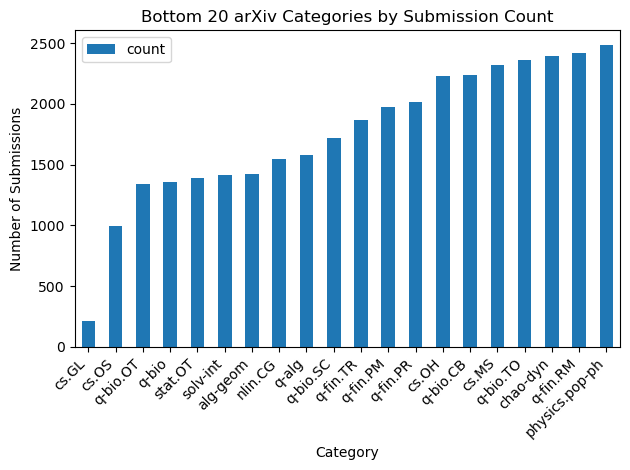

In [54]:
import matplotlib.pyplot as plt
df.head(20).plot(kind='bar')
plt.title('Bottom 20 arXiv Categories by Submission Count')
plt.xlabel('Category')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now all but one category has at least 1000 samples which may be enough for the classifier to learn, after undersampling the top classes.

In [56]:
!python ../analysis/scrape_categories.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


{'cs.AI': 'Artificial Intelligence', 'cs.AR': 'Hardware Architecture', 'cs.CC': 'Computational Complexity', 'cs.CE': 'Computational Engineering, Finance, and Science', 'cs.CG': 'Computational Geometry', 'cs.CL': 'Computation and Language', 'cs.CR': 'Cryptography and Security', 'cs.CV': 'Computer Vision and Pattern Recognition', 'cs.CY': 'Computers and Society', 'cs.DB': 'Databases', 'cs.DC': 'Distributed, Parallel, and Cluster Computing', 'cs.DL': 'Digital Libraries', 'cs.DM': 'Discrete Mathematics', 'cs.DS': 'Data Structures and Algorithms', 'cs.ET': 'Emerging Technologies', 'cs.FL': 'Formal Languages and Automata Theory', 'cs.GL': 'General Literature', 'cs.GR': 'Graphics', 'cs.GT': 'Computer Science and Game Theory', 'cs.HC': 'Human-Computer Interaction', 'cs.IR': 'Information Retrieval', 'cs.IT': 'Information Theory', 'cs.LG': 'Machine Learning', 'cs.LO': 'Logic in Computer Science', 'cs.MA': 'Multiagent Systems', 'cs.MM': 'Multimedia', 'cs.MS': 'Mathematical Software', 'cs.NA': 'Nu

In [57]:
scraped_categories = {'cs.AI': 'Artificial Intelligence', 'cs.AR': 'Hardware Architecture', 'cs.CC': 'Computational Complexity', 'cs.CE': 'Computational Engineering, Finance, and Science', 'cs.CG': 'Computational Geometry', 'cs.CL': 'Computation and Language', 'cs.CR': 'Cryptography and Security', 'cs.CV': 'Computer Vision and Pattern Recognition', 'cs.CY': 'Computers and Society', 'cs.DB': 'Databases', 'cs.DC': 'Distributed, Parallel, and Cluster Computing', 'cs.DL': 'Digital Libraries', 'cs.DM': 'Discrete Mathematics', 'cs.DS': 'Data Structures and Algorithms', 'cs.ET': 'Emerging Technologies', 'cs.FL': 'Formal Languages and Automata Theory', 'cs.GL': 'General Literature', 'cs.GR': 'Graphics', 'cs.GT': 'Computer Science and Game Theory', 'cs.HC': 'Human-Computer Interaction', 'cs.IR': 'Information Retrieval', 'cs.IT': 'Information Theory', 'cs.LG': 'Machine Learning', 'cs.LO': 'Logic in Computer Science', 'cs.MA': 'Multiagent Systems', 'cs.MM': 'Multimedia', 'cs.MS': 'Mathematical Software', 'cs.NA': 'Numerical Analysis', 'cs.NE': 'Neural and Evolutionary Computing', 'cs.NI': 'Networking and Internet Architecture', 'cs.OH': 'Other Computer Science', 'cs.OS': 'Operating Systems', 'cs.PF': 'Performance', 'cs.PL': 'Programming Languages', 'cs.RO': 'Robotics', 'cs.SC': 'Symbolic Computation', 'cs.SD': 'Sound', 'cs.SE': 'Software Engineering', 'cs.SI': 'Social and Information Networks', 'cs.SY': 'Systems and Control', 'econ.EM': 'Econometrics', 'econ.GN': 'General Economics', 'econ.TH': 'Theoretical Economics', 'eess.AS': 'Audio and Speech Processing', 'eess.IV': 'Image and Video Processing', 'eess.SP': 'Signal Processing', 'eess.SY': 'Systems and Control', 'math.AC': 'Commutative Algebra', 'math.AG': 'Algebraic Geometry', 'math.AP': 'Analysis of PDEs', 'math.AT': 'Algebraic Topology', 'math.CA': 'Classical Analysis and ODEs', 'math.CO': 'Combinatorics', 'math.CT': 'Category Theory', 'math.CV': 'Complex Variables', 'math.DG': 'Differential Geometry', 'math.DS': 'Dynamical Systems', 'math.FA': 'Functional Analysis', 'math.GM': 'General Mathematics', 'math.GN': 'General Topology', 'math.GR': 'Group Theory', 'math.GT': 'Geometric Topology', 'math.HO': 'History and Overview', 'math.IT': 'Information Theory', 'math.KT': 'K-Theory and Homology', 'math.LO': 'Logic', 'math.MG': 'Metric Geometry', 'math.MP': 'Mathematical Physics', 'math.NA': 'Numerical Analysis', 'math.NT': 'Number Theory', 'math.OA': 'Operator Algebras', 'math.OC': 'Optimization and Control', 'math.PR': 'Probability', 'math.QA': 'Quantum Algebra', 'math.RA': 'Rings and Algebras', 'math.RT': 'Representation Theory', 'math.SG': 'Symplectic Geometry', 'math.SP': 'Spectral Theory', 'math.ST': 'Statistics Theory', 'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics', 'astro-ph.EP': 'Earth and Planetary Astrophysics', 'astro-ph.GA': 'Astrophysics of Galaxies', 'astro-ph.HE': 'High Energy Astrophysical Phenomena', 'astro-ph.IM': 'Instrumentation and Methods for Astrophysics', 'astro-ph.SR': 'Solar and Stellar Astrophysics', 'cond-mat.dis-nn': 'Disordered Systems and Neural Networks', 'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics', 'cond-mat.mtrl-sci': 'Materials Science', 'cond-mat.other': 'Other Condensed Matter', 'cond-mat.quant-gas': 'Quantum Gases', 'cond-mat.soft': 'Soft Condensed Matter', 'cond-mat.stat-mech': 'Statistical Mechanics', 'cond-mat.str-el': 'Strongly Correlated Electrons', 'cond-mat.supr-con': 'Superconductivity', 'gr-qc': 'General Relativity and Quantum Cosmology', 'hep-ex': 'High Energy Physics - Experiment', 'hep-lat': 'High Energy Physics - Lattice', 'hep-ph': 'High Energy Physics - Phenomenology', 'hep-th': 'High Energy Physics - Theory', 'math-ph': 'Mathematical Physics', 'nlin.AO': 'Adaptation and Self-Organizing Systems', 'nlin.CD': 'Chaotic Dynamics', 'nlin.CG': 'Cellular Automata and Lattice Gases', 'nlin.PS': 'Pattern Formation and Solitons', 'nlin.SI': 'Exactly Solvable and Integrable Systems', 'nucl-ex': 'Nuclear Experiment', 'nucl-th': 'Nuclear Theory', 'physics.acc-ph': 'Accelerator Physics', 'physics.ao-ph': 'Atmospheric and Oceanic Physics', 'physics.app-ph': 'Applied Physics', 'physics.atm-clus': 'Atomic and Molecular Clusters', 'physics.atom-ph': 'Atomic Physics', 'physics.bio-ph': 'Biological Physics', 'physics.chem-ph': 'Chemical Physics', 'physics.class-ph': 'Classical Physics', 'physics.comp-ph': 'Computational Physics', 'physics.data-an': 'Data Analysis, Statistics and Probability', 'physics.ed-ph': 'Physics Education', 'physics.flu-dyn': 'Fluid Dynamics', 'physics.gen-ph': 'General Physics', 'physics.geo-ph': 'Geophysics', 'physics.hist-ph': 'History and Philosophy of Physics', 'physics.ins-det': 'Instrumentation and Detectors', 'physics.med-ph': 'Medical Physics', 'physics.optics': 'Optics', 'physics.plasm-ph': 'Plasma Physics', 'physics.pop-ph': 'Popular Physics', 'physics.soc-ph': 'Physics and Society', 'physics.space-ph': 'Space Physics', 'quant-ph': 'Quantum Physics', 'q-bio.BM': 'Biomolecules', 'q-bio.CB': 'Cell Behavior', 'q-bio.GN': 'Genomics', 'q-bio.MN': 'Molecular Networks', 'q-bio.NC': 'Neurons and Cognition', 'q-bio.OT': 'Other Quantitative Biology', 'q-bio.PE': 'Populations and Evolution', 'q-bio.QM': 'Quantitative Methods', 'q-bio.SC': 'Subcellular Processes', 'q-bio.TO': 'Tissues and Organs', 'q-fin.CP': 'Computational Finance', 'q-fin.EC': 'Economics', 'q-fin.GN': 'General Finance', 'q-fin.MF': 'Mathematical Finance', 'q-fin.PM': 'Portfolio Management', 'q-fin.PR': 'Pricing of Securities', 'q-fin.RM': 'Risk Management', 'q-fin.ST': 'Statistical Finance', 'q-fin.TR': 'Trading and Market Microstructure', 'stat.AP': 'Applications', 'stat.CO': 'Computation', 'stat.ME': 'Methodology', 'stat.ML': 'Machine Learning', 'stat.OT': 'Other Statistics', 'stat.TH': 'Statistics Theory'}

In [58]:
for category in new_category_counts:
    if category not in scraped_categories:
        print(f"Category {category} not found")

Category alg-geom not found
Category astro-ph not found
Category chao-dyn not found
Category cond-mat not found
Category q-alg not found
Category q-bio not found
Category solv-int not found


Found 7 more categories which can be remapped. I check the true category by going to e.g. https://arxiv.org/archive/alg-geom and first line gives the true category (in this case math.AG). From these astro-ph, cond-mat and q-bio are category classes with multiple subcategories, so I don't remap them.

In [59]:
!python categories.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


{'astro-ph': 105380, 'astro-ph.CO': 69766, 'astro-ph.EP': 30541, 'astro-ph.GA': 67426, 'astro-ph.HE': 60378, 'astro-ph.IM': 30694, 'astro-ph.SR': 62503, 'cond-mat': 14215, 'cond-mat.dis-nn': 24343, 'cond-mat.mes-hall': 93149, 'cond-mat.mtrl-sci': 96388, 'cond-mat.other': 16030, 'cond-mat.quant-gas': 21953, 'cond-mat.soft': 41147, 'cond-mat.stat-mech': 75455, 'cond-mat.str-el': 76024, 'cond-mat.supr-con': 44295, 'cs.AI': 111006, 'cs.AR': 5676, 'cs.CC': 11289, 'cs.CE': 7958, 'cs.CG': 7137, 'cs.CL': 75251, 'cs.CR': 36719, 'cs.CV': 142631, 'cs.CY': 21058, 'cs.DB': 9414, 'cs.DC': 23226, 'cs.DL': 5132, 'cs.DM': 13936, 'cs.DS': 25285, 'cs.ET': 5111, 'cs.FL': 5197, 'cs.GL': 216, 'cs.GR': 6933, 'cs.GT': 12253, 'cs.HC': 20683, 'cs.IR': 19128, 'cs.IT': 48597, 'cs.LG': 200479, 'cs.LO': 16781, 'cs.MA': 8457, 'cs.MM': 7341, 'cs.MS': 2318, 'cs.NA': 26635, 'cs.NE': 15313, 'cs.NI': 23422, 'cs.OH': 2228, 'cs.OS': 994, 'cs.PF': 4205, 'cs.PL': 8250, 'cs.RO': 37442, 'cs.SC': 2682, 'cs.SD': 15896, 'cs.SE': 

In [110]:
new_category_counts = {'astro-ph': 105380, 'astro-ph.CO': 69766, 'astro-ph.EP': 30541, 'astro-ph.GA': 67426, 'astro-ph.HE': 60378, 'astro-ph.IM': 30694, 'astro-ph.SR': 62503, 'cond-mat': 14215, 'cond-mat.dis-nn': 24343, 'cond-mat.mes-hall': 93149, 'cond-mat.mtrl-sci': 96388, 'cond-mat.other': 16030, 'cond-mat.quant-gas': 21953, 'cond-mat.soft': 41147, 'cond-mat.stat-mech': 75455, 'cond-mat.str-el': 76024, 'cond-mat.supr-con': 44295, 'cs.AI': 111006, 'cs.AR': 5676, 'cs.CC': 11289, 'cs.CE': 7958, 'cs.CG': 7137, 'cs.CL': 75251, 'cs.CR': 36719, 'cs.CV': 142631, 'cs.CY': 21058, 'cs.DB': 9414, 'cs.DC': 23226, 'cs.DL': 5132, 'cs.DM': 13936, 'cs.DS': 25285, 'cs.ET': 5111, 'cs.FL': 5197, 'cs.GL': 216, 'cs.GR': 6933, 'cs.GT': 12253, 'cs.HC': 20683, 'cs.IR': 19128, 'cs.IT': 48597, 'cs.LG': 200479, 'cs.LO': 16781, 'cs.MA': 8457, 'cs.MM': 7341, 'cs.MS': 2318, 'cs.NA': 26635, 'cs.NE': 15313, 'cs.NI': 23422, 'cs.OH': 2228, 'cs.OS': 994, 'cs.PF': 4205, 'cs.PL': 8250, 'cs.RO': 37442, 'cs.SC': 2682, 'cs.SD': 15896, 'cs.SE': 18691, 'cs.SI': 20830, 'cs.SY': 35135, 'econ.EM': 4034, 'econ.GN': 4646, 'econ.TH': 2747, 'eess.AS': 16954, 'eess.IV': 25714, 'eess.SP': 31046, 'eess.SY': 26916, 'gr-qc': 110976, 'hep-ex': 55301, 'hep-lat': 28559, 'hep-ph': 184375, 'hep-th': 170707, 'math-ph': 82161, 'math.AC': 13319, 'math.AG': 54199, 'math.AP': 65009, 'math.AT': 16203, 'math.CA': 22918, 'math.CO': 69047, 'math.CT': 8953, 'math.CV': 17574, 'math.DG': 43443, 'math.DS': 38231, 'math.FA': 32464, 'math.GM': 4157, 'math.GN': 5319, 'math.GR': 23028, 'math.GT': 23525, 'math.HO': 3750, 'math.IT': 48597, 'math.KT': 6079, 'math.LO': 13795, 'math.MG': 11605, 'math.MP': 82161, 'math.NA': 40444, 'math.NT': 43515, 'math.OA': 12972, 'math.OC': 51605, 'math.PR': 58432, 'math.QA': 19444, 'math.RA': 17978, 'math.RT': 27081, 'math.SG': 9346, 'math.SP': 10023, 'math.ST': 24117, 'nlin.AO': 7384, 'nlin.CD': 16052, 'nlin.CG': 1547, 'nlin.PS': 9994, 'nlin.SI': 12127, 'nucl-ex': 26432, 'nucl-th': 58502, 'physics.acc-ph': 8002, 'physics.ao-ph': 6993, 'physics.app-ph': 19726, 'physics.atm-clus': 2807, 'physics.atom-ph': 21844, 'physics.bio-ph': 15911, 'physics.chem-ph': 23575, 'physics.class-ph': 8736, 'physics.comp-ph': 24067, 'physics.data-an': 10767, 'physics.ed-ph': 4020, 'physics.flu-dyn': 29555, 'physics.gen-ph': 10431, 'physics.geo-ph': 7509, 'physics.hist-ph': 5078, 'physics.ins-det': 21810, 'physics.med-ph': 7452, 'physics.optics': 48798, 'physics.plasm-ph': 17413, 'physics.pop-ph': 2482, 'physics.soc-ph': 22796, 'physics.space-ph': 6757, 'q-bio': 1356, 'q-bio.BM': 5927, 'q-bio.CB': 2236, 'q-bio.GN': 3301, 'q-bio.MN': 3821, 'q-bio.NC': 10126, 'q-bio.OT': 1338, 'q-bio.PE': 11767, 'q-bio.QM': 11104, 'q-bio.SC': 1718, 'q-bio.TO': 2359, 'q-fin.CP': 2628, 'q-fin.EC': 5210, 'q-fin.GN': 2731, 'q-fin.MF': 2702, 'q-fin.PM': 1977, 'q-fin.PR': 2014, 'q-fin.RM': 2420, 'q-fin.ST': 3764, 'q-fin.TR': 1869, 'quant-ph': 156240, 'stat.AP': 19614, 'stat.CO': 8712, 'stat.ME': 28982, 'stat.ML': 68486, 'stat.OT': 1391, 'stat.TH': 24117}

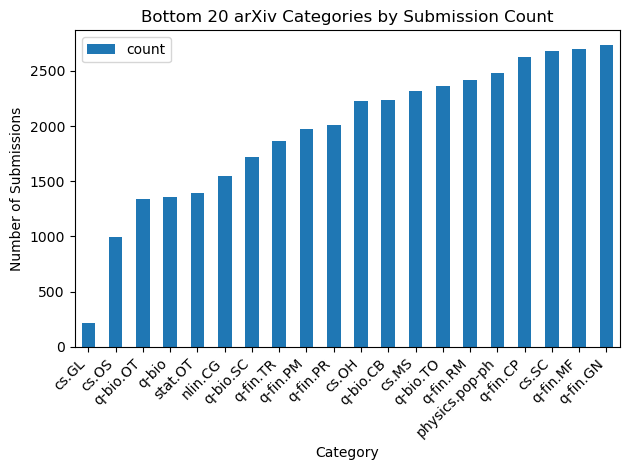

In [64]:
df = pd.DataFrame.from_dict(new_category_counts, orient='index', columns=['count'])
df = df.sort_values('count', ascending=True)
df.head(20).plot(kind='bar')
plt.title('Bottom 20 arXiv Categories by Submission Count')
plt.xlabel('Category')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [65]:
df['count'].mean()

28478.278481012658

In [66]:
df['count'].median()

16492.0

**After remapping the median and average counts for labels have increased by about ~3k which should improve the class imbalance significantly.**

## Undersampling

The undersampling task for multi-label classification is non-trivial if we aim to discover which samples are the best candidates to remove based on the information they give to the classifier. For multi-class classification some common algorithms include Near-Miss, Condensed Nearest Neighbours and Tomek Links - https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/  
These however all work assuming each sample has only one class while in multi-label classification many samples have multiple classes, so there is added value in preserving given combinations, so a smart undersampler wouldn't just consider the labels as independent and remove interesting combinations including a majority class.  
This paper provides some adaptations to these algorithms for the multi-label case: https://www.din.uem.br/yandre/Neurocomputing_MLTL.pdf  
Due to time constrictions and added complexity **I decided on a simple algorithm I thought of where I would downsample only labels which have counts above the median with a probability, that would make their count equal to the median if applied**.  
To account for combinations of labels including a majority and minority label for example, to remove a sample with multiple categories, I run a coin-toss for each category of the sample according to their probabilities and drop only if all coin-tosses agree to drop.  
On the initial dataset without the remapping of labels, **this resulted in a dataset with 1250081 examples, while initially they were 2635119, so about half the dataset was dropped.** 

## Oversampling

I researched through some common oversampling techniques:
* Duplication - This is the simplest approach to implement but duplicating samples may lead to BERT memorizing them instead of generalizing. I would prefer an approach where augmented/new data is added instead of just duplicates.
* `SMOTE` seems to work well for features with real numbers but it's unclear how it would perform on text. Most likely to apply it I would first tokenize the abstracts for the minority classes and run SMOTE on the input_ids to generate similar tests. However some [discussions](https://datascience.stackexchange.com/questions/91141/is-it-good-practice-to-use-smote-when-you-have-a-data-set-that-has-imbalanced-cl) point to a disadvantage of this that SMOTE may not generate natural enough text as input to BERT which may confuse it and lead to worse results. It could be tested.
* Generate abstract using a GPT model - i.e. GPT-2. As this should add high quality natural text which may include new information, this is my preferred approach. Actually, I was on the route to implement that when I started scraping category tags to get their names, so I can feed the to GPT-2, when I discovered the category inconsistency. After doing the remapping now only one category is severely undersampled, so I'll implement oversampling only if model metrics are low.

## A wild idea for an alternative solution to this task using a different form of BERT fine-tuning

Given that BERT was specifically trained on the task of Masked Language Modelling, one idea for fine-tuning it for the article classifier purposes could be to fine-tune it on Masked Language Modelling specific to our dataset. This could be done by prepending the abstract with `This abstract on the subject of <mask>`. For abstracts with multiple categories we could include one input like that for each category.   Then fine-tune bert to learn that `<mask>` is either the tag `cs.AI` directly, or perhaps more naturally learn the user-friendly category name like `Artificial intelligence` instead. (For multiple words perhaps more mask tokens should be included).   
Since BERT outputs different mask options with scores, we could consider the suggestions above a given score as the categories chosen, so it would keep the multi-label outputs.  
On prediction time we again prepend the text with the masked category, get the suggestions and if they are in natural language like "Artificial intelligence", find the embedding for it and find the real category with closest embedding, then take its tag to produce the output.  
My intuition is that since this form of fine-tuning is closer to BERT's original training, it may be a lot faster in learning to classify the abstracts this way.

## GPU Utilization

I experimented with a few different settings for batch size and found that a batch size of 64, combined with fp16 mixed precision ended up using the GPU RAM to its fullest, barely not hitting OOM during training: ![GPU Utilization](gpu_utilization.png)
This uses the T4 GPU available in Google Colab


## Class imbalance training observations

From the training metrics it can be seen that 15% into the first epoch the micro/weighted/samples variants of the metrics, as well as the hamming loss, all of which promote predicting the dominant labels, have relatively high values. While the accuracy and the macro metrics, which treat as equal all labels are significantly lower:

```json
{
      "epoch": 0.43735528685361463,
      "eval_accuracy": 0.2669972804351304,
      "eval_f1_macro": 0.4358475675540043,
      "eval_f1_micro": 0.569172640961054,
      "eval_f1_samples": 0.5474074566539773,
      "eval_f1_weighted": 0.5403750421299274,
      "eval_hamming_loss": 0.009005141455848078,
      "eval_loss": 0.02559889666736126,
      "eval_precision_macro": 0.6128437314672721,
      "eval_precision_micro": 0.7251295976302148,
      "eval_precision_samples": 0.6534927744894151,
      "eval_precision_weighted": 0.6979897023965469,
      "eval_recall_macro": 0.3695541740967837,
      "eval_recall_micro": 0.46842608834316696,
      "eval_recall_samples": 0.5211701365876698,
      "eval_recall_weighted": 0.46842608834316696,
      "eval_runtime": 43.2114,
      "eval_samples_per_second": 144.661,
      "eval_steps_per_second": 2.268,
      "step": 8500
}
```
This shows that the model is biased to predict to dominant labels correctly and get the underrepresented ones wrong.  
More insights can also be found in the difference between precision and recall - the macro precision is much higher than the macro recall.  
This means the model doesn't produce much false positives, but procuses false negatives - so it doesn't predict the rare labels in the samples with true positives for them.

## Loss decrease over training iterations

In [82]:
%cd ..

/Users/bbagaliyska/Projects/learning/ai/iristask/research-classifier/research_classifier


In [83]:
%cd analysis

/Users/bbagaliyska/Projects/learning/ai/iristask/research-classifier/research_classifier/analysis


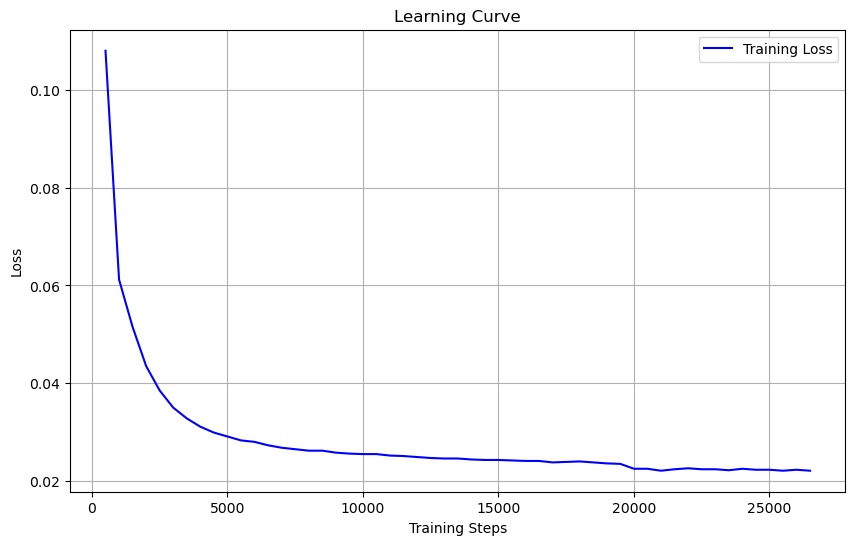

In [96]:
import json
with open('trainer_state.json', 'r') as file:
    trainer_history = json.load(file)["log_history"]
losses = []
steps = []

for entry in trainer_history:
    if 'loss' in entry:
        losses.append(entry['loss'])
        steps.append(entry['step'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(steps, losses, 'b-', label='Training Loss')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(True)
plt.legend()

plt.show()

It seems that the learning hit a plateau at about 20000 steps (~1/3 into the dataset). The metrics from the 26500'th step are the following:

```json
{
      "epoch": 1.3635194237200925,
      "eval_accuracy": 0.3154695248760198,
      "eval_f1_macro": 0.5430829543167313,
      "eval_f1_micro": 0.6346931275266446,
      "eval_f1_samples": 0.6200034603410064,
      "eval_f1_weighted": 0.6157003402196517,
      "eval_hamming_loss": 0.008051370008646717,
      "eval_loss": 0.02252613753080368,
      "eval_precision_macro": 0.6895649655063975,
      "eval_precision_micro": 0.7487535226533709,
      "eval_precision_samples": 0.7116328054177998,
      "eval_precision_weighted": 0.7322270745984094,
      "eval_recall_macro": 0.4752327816642215,
      "eval_recall_micro": 0.5507893477914209,
      "eval_recall_samples": 0.6055301627930008,
      "eval_recall_weighted": 0.5507893477914209,
      "eval_runtime": 42.9389,
      "eval_samples_per_second": 145.579,
      "eval_steps_per_second": 2.282,
      "step": 26500
}```

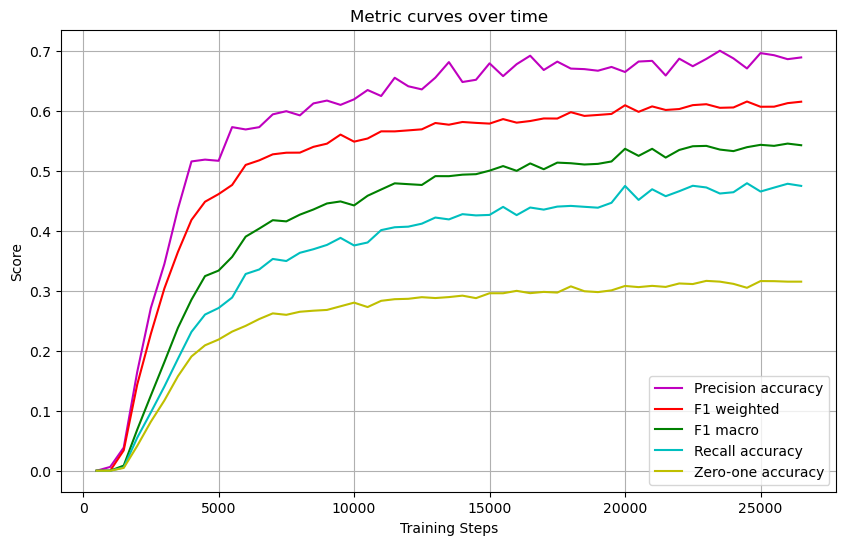

In [102]:
f1_macro = []
f1_weighted = []
accuracy = []
steps = []
precicion_macro = []
recall_macro = []


for entry in trainer_history:
    if 'eval_f1_macro' in entry:
        f1_macro.append(entry['eval_f1_macro'])
        steps.append(entry['step'])
    if 'eval_f1_weighted' in entry:
        f1_weighted.append(entry['eval_f1_weighted'])
    if 'eval_accuracy' in entry:
        accuracy.append(entry['eval_accuracy'])
    if 'eval_precision_macro' in entry:
        precicion_macro.append(entry['eval_precision_macro'])
    if 'eval_recall_macro' in entry:
        recall_macro.append(entry['eval_recall_macro'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(steps, precicion_macro, 'm-', label='Precision accuracy')
plt.plot(steps, f1_weighted, 'r-', label='F1 weighted')
plt.plot(steps, f1_macro, 'g-', label='F1 macro')
plt.plot(steps, recall_macro, 'c-', label='Recall accuracy')
plt.plot(steps, accuracy, 'y-', label='Zero-one accuracy')
plt.xlabel('Training Steps')
plt.ylabel('Score')
plt.title('Metric curves over time')
plt.grid(True)
plt.legend()

plt.show()

## Recall by labels
For debugging which labels are struggling to clasify I wrote a script to evaluate debug metrics per label. Results are in [metrics.json](../output_final/metrics.json)  
Since recall was the least performing metrics across the macro ones, analyze it:

In [114]:
labels = sorted(new_category_counts.keys())

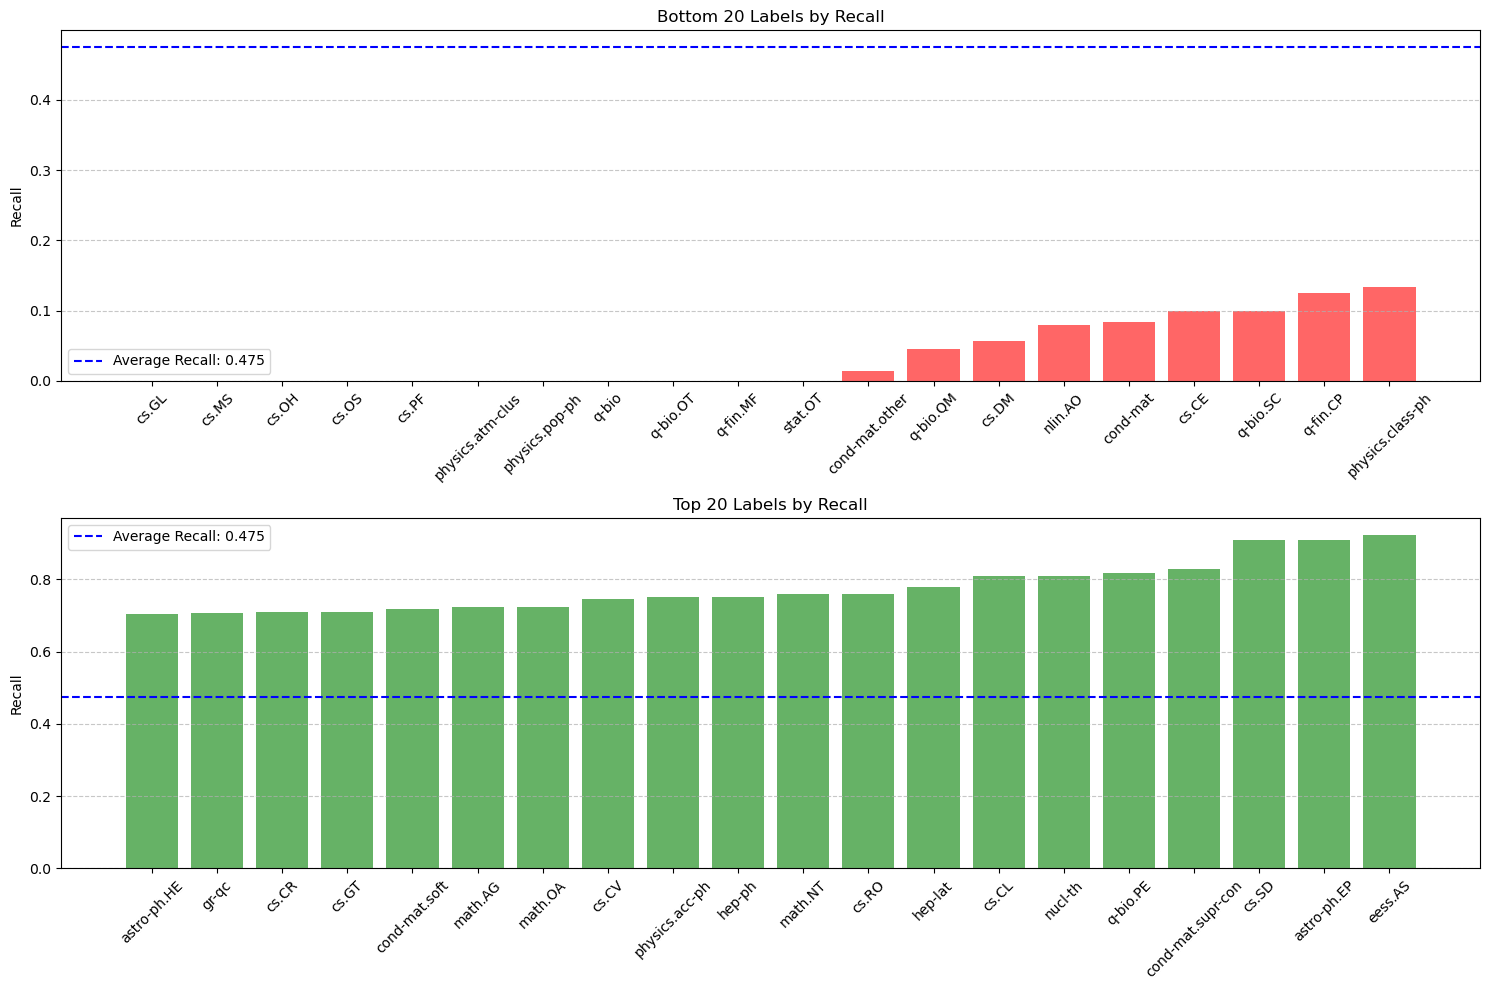

In [133]:
import json
import numpy as np
with open('../output_final/metrics.json', 'r') as file:
    metrics = json.load(file)
    
recall_pairs = []
for key, value in metrics.items():
    if key.startswith('eval_recall_'):
        label_id = int(key.split('_')[-1])
        recall_pairs.append((label_id, value))

# Sort by recall value
recall_pairs.sort(key=lambda x: x[1])

# Get bottom and top 20
bottom_20_recall = recall_pairs[:20]
top_20_recall = recall_pairs[-20:]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot bottom 20
bottom_recall_label_ids, recalls = zip(*bottom_20_recall)
bottom_recall_label_ids = [labels[id] for id in bottom_recall_label_ids]
ax1.bar(range(len(bottom_20_recall)), recalls, color='red', alpha=0.6)
ax1.set_xticks(range(len(bottom_20_recall)))
ax1.set_xticklabels(bottom_recall_label_ids, rotation=45)
ax1.set_title('Bottom 20 Labels by Recall')
ax1.set_ylabel('Recall')
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Plot top 20
top_recall_label_ids, recalls = zip(*top_20_recall)
ax2.bar(range(len(top_20_recall)), recalls, color='green', alpha=0.6)
ax2.set_xticks(range(len(top_20_recall)))
ax2.set_xticklabels([labels[id] for id in top_recall_label_ids], rotation=45)
ax2.set_title('Top 20 Labels by Recall')
ax2.set_ylabel('Recall')
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add overall average line to both plots
avg_recall = np.mean([pair[1] for pair in recall_pairs])
ax1.axhline(y=avg_recall, color='blue', linestyle='--', 
            label=f'Average Recall: {avg_recall:.3f}')
ax2.axhline(y=avg_recall, color='blue', linestyle='--', 
            label=f'Average Recall: {avg_recall:.3f}')

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

In [162]:
label_counts_sorted = sorted(new_category_counts.items(), key=lambda x: x[1])
label_counts_sorted = [x[0] for x in label_counts_sorted]
bottom_count_label_ids = label_counts_sorted[:30]

In [163]:
overlap_bottom = set(bottom_count_label_ids) & set(bottom_recall_label_ids)
overlap_bottom

{'cs.GL',
 'cs.MS',
 'cs.OH',
 'cs.OS',
 'cs.PF',
 'physics.atm-clus',
 'physics.pop-ph',
 'q-bio',
 'q-bio.OT',
 'q-bio.SC',
 'q-fin.CP',
 'q-fin.MF',
 'stat.OT'}

In [164]:
len(overlap_bottom)

13

In [165]:
zero_recall_labels = bottom_recall_label_ids[:11]

In [166]:
zero_recall_overlap = set(bottom_count_label_ids) & set(zero_recall_labels)
len(zero_recall_overlap)

11

In [168]:
len(set(label_counts_sorted[:100]) & set(bottom_recall_label_ids))

20

13/20 of the bottom labels by recall are among the 30 most underepresented ones.  
All the ones with 0 recall are minority (that's expected since 0.0 recall probably means no such entries were in the evaluation set).  
Interestingly there are other labels which have enough entries but still get low recalls - still all of them are in the bottom 100 according to count.  
It seems like learning optimizes to maximize true positives for the top majority labels while being conservative at predicting other labels resulting in low recall for them.  
To improve this, we should oversample the minority classes and perhaps combine with a different loss function like focal loss to target "hard" samples or weighted binary cross entropy to assign less weight to majority labels.  